# Imports :

Solving Kaggle competition : https://www.kaggle.com/competitions/nlp-sentiment-analysis-xm 

In [16]:
from datasets import load_dataset

emotions = load_dataset("csv", data_files="data/train.csv")

In [17]:
emotions


DatasetDict({
    train: Dataset({
        features: ['ID', 'Text', 'Category'],
        num_rows: 1600
    })
})

In [18]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,ID,Text,Category
0,969,@JuliaBradbury @SimonCalder @walsop @HodderPRI...,0
1,241,or here https://t.co/R2tO79Easn … .An in house...,1
2,820,@britshmuseum @thehistoryguy Gosh periscope is...,2
3,693,@Ophiolatrist britishmuseum The stupid #French...,1
4,421,@SassyClde We won't stop til @britishmuseum du...,1


In [19]:
#check the categories :

df["Category"].value_counts()

Category
1    409
3    404
0    394
2    393
Name: count, dtype: int64

In [20]:
#  show text of each category

print("category 0 : " , df[df["Category"] == 0]["Text"].values[2]) #happy ?
print("category 1 : " , df[df["Category"] == 1]["Text"].values[1]) #angry ?
print("category 2 : " , df[df["Category"] == 2]["Text"].values[2]) #fear ?
print("category 3 : " , df[df["Category"] == 3]["Text"].values[2]) #sad ?

category 0 :  James Richards extraordinary instln @_TheWhitechapel is a brilliantly obliquely piece of critical interpretation. Sonic art theory. Lush
category 1 :  @Ophiolatrist britishmuseum The stupid #French prick was crushed by my Russian Imperial ancestors. 😂 #Waterloo200
category 2 :  @britishmuseum @Moobootica Wow, he was a very old 32.
category 3 :  at the @NationalGallery . the#InventingImpressionism is a strictly No Photo area, so shot the museum shop instead http://t.co/k5JpZfY7b5


In [21]:
#hugging face transformers for sentiment analysis:

from transformers import pipeline

classifier = pipeline("sentiment-analysis")

#test the model :

print(classifier(df[df["Category"] == 0]["Text"].values[1]))
print(classifier(df[df["Category"] == 1]["Text"].values[1]))
print(classifier(df[df["Category"] == 2]["Text"].values[1]))
print(classifier(df[df["Category"] == 3]["Text"].values[1]))

# but this is predicting positive and negative , which coud be a feature column
# we need to predict the category of the emotion



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
/Users/I518759/Documents/SnigdhaGithub/NLP-with-Transformers/env/lib/python3.12/site-packages/transformers/modeling_utils.py:1435: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=Tr

[{'label': 'POSITIVE', 'score': 0.9987659454345703}]
[{'label': 'NEGATIVE', 'score': 0.9995537400245667}]
[{'label': 'NEGATIVE', 'score': 0.9994470477104187}]
[{'label': 'POSITIVE', 'score': 0.979756772518158}]


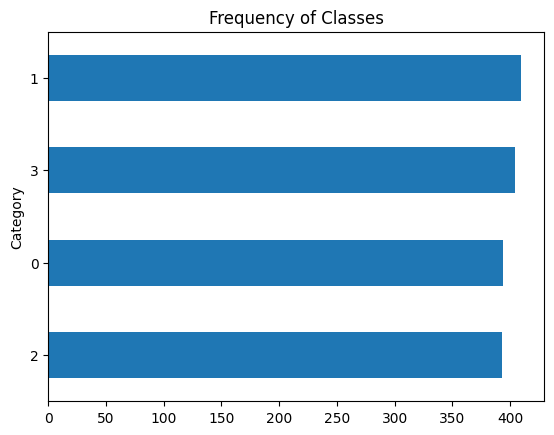

In [22]:
import matplotlib.pyplot as plt

df["Category"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

Text(0.5, 0.98, '')

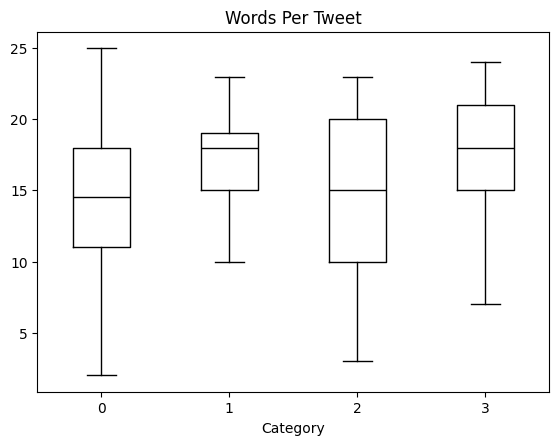

In [23]:
df["Words Per Tweet"] = df["Text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="Category", grid=False,
showfliers=False, color="black")
plt.suptitle("")

In [24]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [25]:
text = df["Text"].values[0]

tokens = tokenizer.tokenize(text)

print("Original Text:", text)

print("Tokens:", tokens)

Original Text: @JuliaBradbury @SimonCalder @walsop @HodderPRIBA @_TheWhitechapel A pleasure to meet you all last week!
Tokens: ['@', 'julia', '##bra', '##db', '##ury', '@', 'simon', '##cal', '##der', '@', 'wal', '##sop', '@', 'ho', '##dder', '##pr', '##iba', '@', '_', 'the', '##w', '##hit', '##ech', '##ape', '##l', 'a', 'pleasure', 'to', 'meet', 'you', 'all', 'last', 'week', '!']


In [33]:
emotions

DatasetDict({
    train: Dataset({
        features: ['ID', 'Text', 'Category'],
        num_rows: 1600
    })
})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               1600 non-null   int64 
 1   Text             1600 non-null   object
 2   Category         1600 non-null   int64 
 3   Words Per Tweet  1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 50.1+ KB


In [39]:

# Define a function to convert the 'text' column to str
def convert_to_str(batch):
    batch["Text"] = [str(text) for text in batch["Text"]]
    return batch

# Apply the function to the dataset
emotions = emotions.map(convert_to_str, batched=True)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [46]:
emotions.reset_format()

In [48]:
emotions

DatasetDict({
    train: Dataset({
        features: ['ID', 'Text', 'Category'],
        num_rows: 1600
    })
})

In [49]:
def tokenize(batch):
    return tokenizer(batch["Text"], padding=True, truncation=True)

In [50]:
# Apply the tokenize function to the dataset
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [52]:
emotions_encoded["train"].column_names

['ID', 'Text', 'Category', 'input_ids', 'attention_mask']

# Transformers as Feature Extractors

In [55]:
# hide_output
import torch
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

/Users/I518759/Documents/SnigdhaGithub/NLP-with-Transformers/env/lib/python3.12/site-packages/transformers/modeling_utils.py:1435: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

In [56]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [58]:
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "Category"])

In [59]:
#hide_output
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [60]:
emotions_hidden["train"].column_names

['ID', 'Text', 'Category', 'input_ids', 'attention_mask', 'hidden_state']

In [64]:
import numpy as np

X = np.array(emotions_hidden["train"]["hidden_state"])
y = np.array(emotions_hidden["train"]["Category"])

X_train = X[:1001]
y_train = y[:1001]

X_valid = X[1001:]
y_valid = y[1001:]
X_train.shape, X_valid.shape

((1001, 768), (599, 768))

In [65]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,X,Y,label
0,9.832171,8.552324,0
1,8.086497,13.120673,1
2,12.140408,8.782636,2
3,11.089877,10.337604,1
4,8.394504,10.175056,1


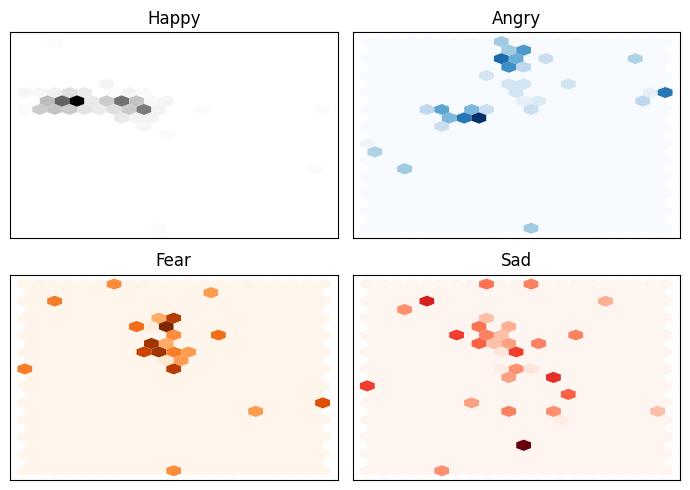

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds"]
labels = ["Happy", "Angry", "Fear", "Sad"]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [79]:
#hide_output
# We increase `max_iter` to guarantee convergence 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [80]:
lr_clf.score(X_valid, y_valid)

0.9532554257095158

In [81]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.2287145242070117

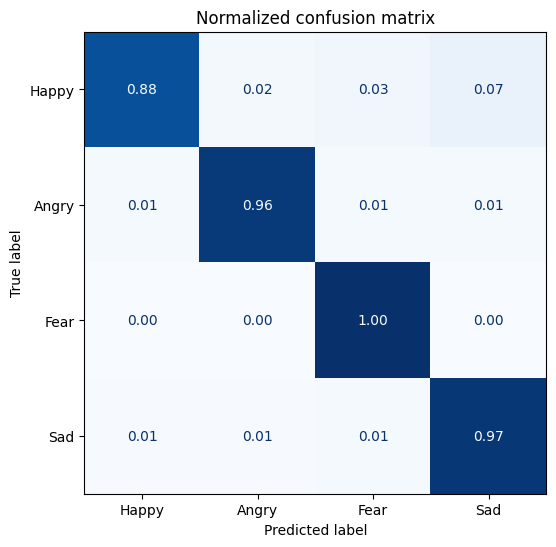

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# Fine-Tuning Transformers

In [124]:
# Load the dataset
emotions = load_dataset("csv", data_files="data/train.csv")

# Split the dataset into training and test sets
train_test_split = emotions['train'].train_test_split(test_size=0.3)


In [125]:
train_test_split

DatasetDict({
    train: Dataset({
        features: ['ID', 'Text', 'Category'],
        num_rows: 1120
    })
    test: Dataset({
        features: ['ID', 'Text', 'Category'],
        num_rows: 480
    })
})

In [126]:
emotions_encoded = train_test_split.map(tokenize, batched=True)

Map:   0%|          | 0/1120 [00:00<?, ? examples/s]

Map:   0%|          | 0/480 [00:00<?, ? examples/s]

In [129]:
emotions_encoded = emotions_encoded.rename_column("Category", "label")

In [130]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['ID', 'Text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1120
    })
    test: Dataset({
        features: ['ID', 'Text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 480
    })
})

In [131]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

In [132]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [134]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False, 
                                  log_level="error")


trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["test"],
                  tokenizer=tokenizer)
trainer.train();

/Users/I518759/Documents/SnigdhaGithub/NLP-with-Transformers/env/lib/python3.12/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/90 [00:00<?, ?it/s]

{'loss': 0.9051, 'learning_rate': 1.6222222222222223e-05, 'epoch': 0.94}


  0%|          | 0/8 [00:00<?, ?it/s]

{'eval_loss': 0.6563452482223511, 'eval_accuracy': 0.8875, 'eval_f1': 0.8846915797903555, 'eval_runtime': 3.4874, 'eval_samples_per_second': 137.637, 'eval_steps_per_second': 2.294, 'epoch': 1.0}
{'loss': 0.5553, 'learning_rate': 1.2444444444444446e-05, 'epoch': 1.89}


  0%|          | 0/8 [00:00<?, ?it/s]

{'eval_loss': 0.41998928785324097, 'eval_accuracy': 0.9333333333333333, 'eval_f1': 0.9327275804915167, 'eval_runtime': 3.4102, 'eval_samples_per_second': 140.755, 'eval_steps_per_second': 2.346, 'epoch': 2.0}
{'loss': 0.3702, 'learning_rate': 8.666666666666668e-06, 'epoch': 2.83}


  0%|          | 0/8 [00:00<?, ?it/s]

{'eval_loss': 0.2715887725353241, 'eval_accuracy': 0.9666666666666667, 'eval_f1': 0.966555525710314, 'eval_runtime': 3.4944, 'eval_samples_per_second': 137.364, 'eval_steps_per_second': 2.289, 'epoch': 3.0}
{'loss': 0.2305, 'learning_rate': 4.888888888888889e-06, 'epoch': 3.78}


  0%|          | 0/8 [00:00<?, ?it/s]

{'eval_loss': 0.20949368178844452, 'eval_accuracy': 0.9708333333333333, 'eval_f1': 0.9706222961320523, 'eval_runtime': 3.4391, 'eval_samples_per_second': 139.57, 'eval_steps_per_second': 2.326, 'epoch': 4.0}
{'loss': 0.1777, 'learning_rate': 1.111111111111111e-06, 'epoch': 4.72}


  0%|          | 0/8 [00:00<?, ?it/s]

{'eval_loss': 0.1929199993610382, 'eval_accuracy': 0.9708333333333333, 'eval_f1': 0.9706222961320523, 'eval_runtime': 3.4699, 'eval_samples_per_second': 138.333, 'eval_steps_per_second': 2.306, 'epoch': 5.0}
{'train_runtime': 159.7547, 'train_samples_per_second': 35.054, 'train_steps_per_second': 0.563, 'train_loss': 0.43187028500768876, 'epoch': 5.0}


In [135]:
preds_output = trainer.predict(emotions_encoded["test"])

  0%|          | 0/8 [00:00<?, ?it/s]

In [136]:
preds_output.metrics

{'test_loss': 0.1929199993610382,
 'test_accuracy': 0.9708333333333333,
 'test_f1': 0.9706222961320523,
 'test_runtime': 3.4135,
 'test_samples_per_second': 140.616,
 'test_steps_per_second': 2.344}

In [137]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [140]:
y_valid = emotions_encoded["test"]["label"]

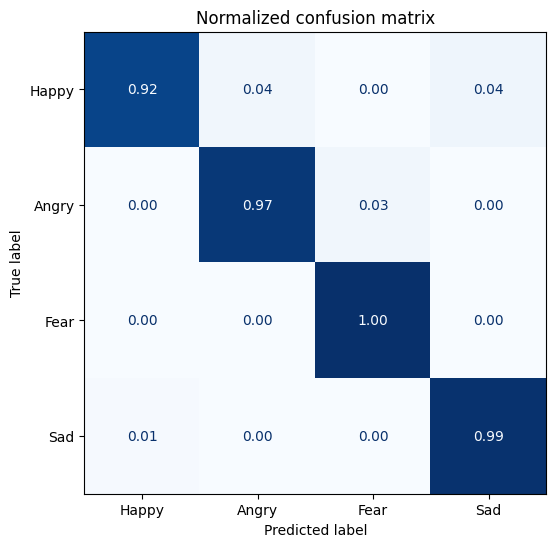

In [141]:
plot_confusion_matrix(y_preds, y_valid, ["Happy", "Angry", "Fear", "Sad"])

In [142]:
trainer.save_model(model_name)

In [145]:
from transformers import pipeline

classifier = pipeline("text-classification", model = model_name)

/Users/I518759/Documents/SnigdhaGithub/NLP-with-Transformers/env/lib/python3.12/site-packages/transformers/modeling_utils.py:1435: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

In [146]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

In [158]:
# get the label with the highest score
max(preds[0], key=lambda x: x['score'])['label']



'LABEL_0'

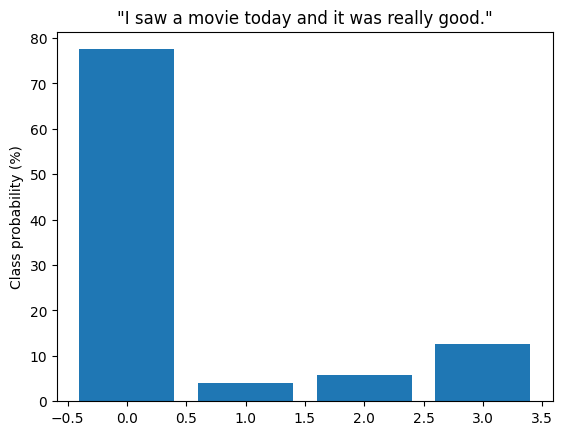

In [147]:
preds_df = pd.DataFrame(preds[0])
plt.bar([0,1,2,3], 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [167]:
#load the test data

test_data = pd.read_csv("data/test_features.csv")

test_data.head()


,ID,Text
0,1861,Goodbye @kettlesyard see you in .25 years! htt...
1,354,"@BBC_Culture @PlymouthMuseum Oh dear, why not ..."
2,1334,Fantastic @johnmcdonnellMP standing up for wor...
3,906,"@BBC_Culture @PlymouthMuseum Oh dear, why not ..."
4,1290,@britishmuseum @TripAdvisor it is !


In [168]:
def get_predicted_label(text):
    predictions = classifier(text)
    # Extract the label with the highest score
    predicted_label = max(predictions, key=lambda x: x['score'])['label']
    return predicted_label

In [169]:
test_data["predicted_label"] = test_data["Text"].apply(get_predicted_label)

In [172]:
label_mapping = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2,
    'LABEL_3': 3
}

# Map predicted labels to descriptive names
test_data['Predictions'] = test_data['predicted_label'].map(label_mapping)

In [173]:
test_data.head()

,ID,Text,predicted_label,Predictions
0,1861,Goodbye @kettlesyard see you in .25 years! htt...,LABEL_3,3
1,354,"@BBC_Culture @PlymouthMuseum Oh dear, why not ...",LABEL_3,3
2,1334,Fantastic @johnmcdonnellMP standing up for wor...,LABEL_1,1
3,906,"@BBC_Culture @PlymouthMuseum Oh dear, why not ...",LABEL_3,3
4,1290,@britishmuseum @TripAdvisor it is !,LABEL_0,0


In [174]:
test_data[["ID", "Predictions"]].to_csv("data/test_predictions.csv", index=False)

In [175]:
test_data.shape

(400, 4)